<a href="https://colab.research.google.com/github/rubenguerra/hello_world/blob/master/keras_clasificadorImagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa que clasifica imágenes usando python y machine learning

In [0]:
pip install keras

In [0]:
# Carga de la data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [0]:
# Imprime el tipo de data
print(type(x_train))
print(type(y_train))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
# Obtenemos la forma
print('Forma de x_train: ', x_train.shape)
print('Forma de y_train: ', y_train.shape)
print('Forma de x_test: ', x_test.shape)
print('Forma de y_test: ', y_test.shape)

Forma de x_train:  (50000, 32, 32, 3)
Forma de y_train:  (50000, 1)
Forma de x_test:  (10000, 32, 32, 3)
Forma de y_test:  (10000, 1)


In [0]:
# Una mirada a las primeras imágenes en el conjunto de entrenamiento
x_train[0]

# La imagen se descompone en valores numéricos correspondientes a cada uno de los pixels.
# Se despliega un conjunto de valores correspondientes a los valores de colores en la imagen.
# Cada tres valores están en el conjunto RGB(Red, Green, Blue)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

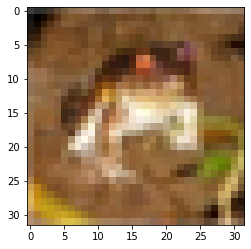

In [0]:
# Muestra la imagen como foto
import matplotlib.pyplot as plt
img = plt.imshow(x_train[0])

In [0]:
# Imprime la etiqueta de la imagen
# Dicha etiqueta numerica tiene una correspondencia con el objeto de la imagen
# 6 corresponde a una rana
print('La etiqueta de la imagen es: ', y_train[0])

La etiqueta de la imagen es:  [6]


In [0]:
# One-Hot Encoding: Convierte la etiqueta en un conjunto de 10 números para introducirla a la red neuronal
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Imprime la nueva etiqueta en el conjunto de entrenamiento
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [0]:
# Imprime un ejemplo de la nueva etiqueta
# El uno está en la posición 6(comienza a contabilizarse desde cero)
print('La one hot label es: ', y_train_one_hot[0])

La one hot label es:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
# Normaliza los pixels en las imagenes en valores entre 0 y 1
# Todos los valores
x_train = x_train / 255
x_test = x_test / 255

In [0]:
# Se construye la Convolutional Neuro Network (Red neuronal convolucional)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Se crea la arquitectura
model = Sequential()

# La capa convolucional
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)) )

# La capa Maxpooling
model.add( MaxPooling2D(pool_size=(2,2)) )

# La capa convolucional
model.add(Conv2D(32, (5,5), activation='relu') )# No necesita el input_shape porque ya no es la primera capa

# La capa Maxpooling
model.add( MaxPooling2D(pool_size=(2,2)) )

# Capa Flatten
model.add( Flatten() )

model.add( Dense(1000, activation='relu') )
model.add( Dense(10, activation='softmax'))

In [0]:
# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Entrenamiento del modelo
hist = model.fit(x_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 35000 samples, validate on 15000 samples
Epoch 1/10





35000/35000 [==============================] - 10s 293us/step - loss: 1.7225 - acc: 0.3786 - val_loss: 1.5049 - val_acc: 0.4480
Epoch 2/10
35000/35000 [==============================] - 2s 57us/step - loss: 1.3723 - acc: 0.5084 - val_loss: 1.2958 - val_acc: 0.5439
Epoch 3/10
35000/35000 [==============================] - 2s 57us/step - loss: 1.2380 - acc: 0.5594 - val_loss: 1.2365 - val_acc: 0.5594
Epoch 4/10
35000/35000 [==============================] - 2s 58us/step - loss: 1.1403 - acc: 0.5960 - val_loss: 1.1418 - val_acc: 0.6020
Epoch 5/10
35000/35000 [==============================] - 2s 58us/step - loss: 1.0756 - acc: 0.6189 - val_loss: 1.1087 - val_acc: 0.6158
Epoch 6/10
35000/35000 [==============================] - 2s 59us/step - loss: 1.0068 - acc: 0.6455 - val_loss: 1.1211 - val_acc: 0.6069
Epoch 7/10
35000/35000 [

In [0]:
# Se obtiene la medida de certeza del modelo
model.evaluate(x_test, y_test_one_hot)[1]


10000/10000 [==============================] - 1s 76us/step


0.6577

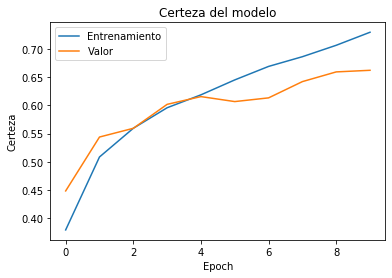

In [0]:
# Visualización de la certeza del modelo
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Certeza del modelo')
plt.ylabel('Certeza')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Valor'], loc= 'upper left')
plt.show()

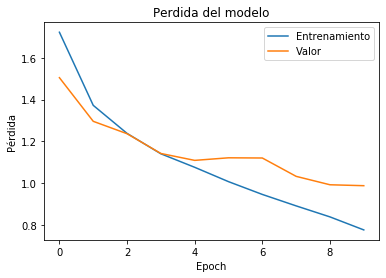

In [0]:
# Visualización de la pérdida del modelo
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Perdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Valor'], loc= 'upper right')
plt.show()

In [0]:
# Carga la data
from google.colab import files
uploaded = files.upload()
my_image = plt.imread('dog1.jpg')

Saving dog1.jpg to dog1.jpg


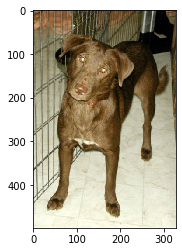

In [0]:
#Presenta la imagen descargada
img = plt.imshow(my_image)

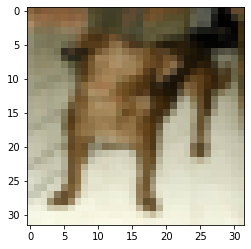

In [0]:
# Redimensionar la imagen
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))
img = plt.imshow(my_image_resized)

In [0]:
# Obtiene la probablidad para cada clase
import numpy as np
probabilities = model.predict( np.array([my_image_resized,]))

# Imprimir la probabilidad
probabilities #El valor más alto arrojado es el de la probalidad de que el objeto en la foto sea de dicha etiqueta

array([[7.2772395e-06, 8.9916128e-09, 6.4456544e-04, 3.7152404e-03,
        3.4411100e-01, 3.1943746e-02, 8.4453575e-05, 6.1949348e-01,
        3.1531819e-09, 1.2289732e-07]], dtype=float32)

In [0]:
number_to_class = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
index = np.argsort(probabilities[0,:])
print('Most likely class: ', number_to_class[index[9]], '--probability: ',probabilities[0,index[9]])
print('SecondMost likely class: ', number_to_class[index[8]], '--probability: ',probabilities[0,index[8]])
print('Third Most likely class: ', number_to_class[index[7]], '--probability: ',probabilities[0,index[7]])
print('Fourth Most likely class: ', number_to_class[index[6]], '--probability: ',probabilities[0,index[6]])
print('Fifth Most likely class: ', number_to_class[index[5]], '--probability: ',probabilities[0,index[5]])

Most likely class:  horse --probability:  0.6194935
SecondMost likely class:  deer --probability:  0.344111
Third Most likely class:  dog --probability:  0.031943746
Fourth Most likely class:  cat --probability:  0.0037152404
Fifth Most likely class:  bird --probability:  0.00064456544


In [0]:
# Guardar el modelo
model.save('mi_modelo.h5')

In [0]:
# Cargar el modelo
from keras.models import load_model
model = load_model('mi_modelo.h5')